In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata
sns.set_theme(style="whitegrid")

In [2]:
path_data = "./data/PIN_MLE_new_20.txt"
df = pd.read_csv(path_data)

# Tables

In [3]:
df.describe()

,alpha,delta,epsilon_b,epsilon_s,mu,buy,sell,MLE
count,2.014086e+07,2.014086e+07,2.014086e+07,2.014086e+07,2.014086e+07,2.014086e+07,2.014086e+07,2.014086e+07
mean,4.950694e-01,4.949451e-01,1.995042e+02,1.995101e+02,1.995081e+02,2.484163e+02,2.493699e+02,-9.019616e+00
std,2.857641e-01,2.857881e-01,5.772931e+01,5.773260e+01,5.773947e+01,1.084904e+02,1.089776e+02,1.266087e+00
min,2.815410e-08,8.866421e-08,1.000000e+02,1.000000e+02,1.000000e+02,5.800000e+01,5.800000e+01,-2.517582e+01
25%,2.476879e-01,2.474901e-01,1.500000e+02,1.500000e+02,1.490000e+02,1.650000e+02,1.660000e+02,-9.668523e+00
50%,4.951557e-01,4.948837e-01,1.990000e+02,2.000000e+02,2.000000e+02,2.300000e+02,2.310000e+02,-8.784830e+00
75%,7.425641e-01,7.424389e-01,2.490000e+02,2.500000e+02,2.500000e+02,2.950000e+02,2.960000e+02,-8.111811e+00
max,9.900000e-01,9.900000e-01,2.990000e+02,2.990000e+02,2.990000e+02,6.820000e+02,6.940000e+02,-6.462882e+00


In [4]:
df.corr()

,alpha,delta,epsilon_b,epsilon_s,mu,buy,sell,MLE
alpha,1.000000,-0.000166,0.000031,0.000085,0.000304,0.260178,0.264238,-0.201539
delta,-0.000166,1.000000,-0.000193,0.000038,0.000338,0.260336,-0.258924,-0.003184
epsilon_b,0.000031,-0.000193,1.000000,0.000106,0.000303,0.000066,0.529696,-0.105517
epsilon_s,0.000085,0.000038,0.000106,1.000000,0.000218,0.532316,0.000198,-0.105668
mu,0.000304,0.000338,0.000303,0.000218,1.000000,0.131040,0.132659,-0.030009
buy,0.260178,0.260336,0.000066,0.532316,0.131040,1.000000,-0.206188,-0.226907
sell,0.264238,-0.258924,0.529696,0.000198,0.132659,-0.206188,1.000000,-0.225040
MLE,-0.201539,-0.003184,-0.105517,-0.105668,-0.030009,-0.226907,-0.225040,1.000000


In [5]:
df_1000 = df.head(1000)

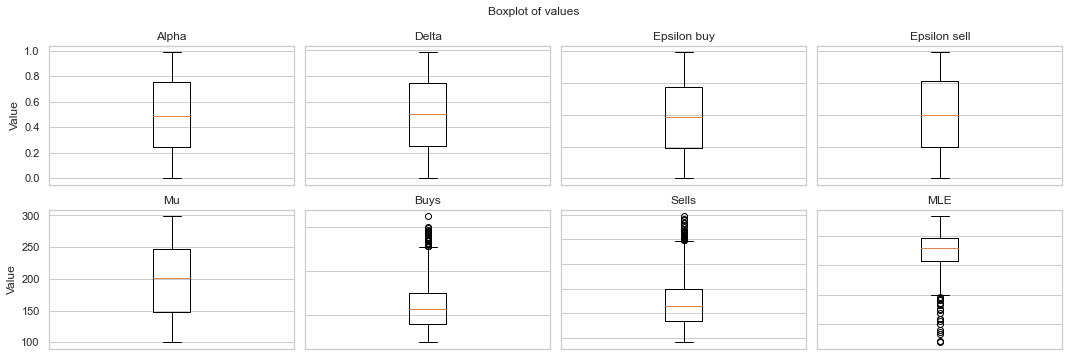

In [31]:

fig, axs = plt.subplots(2, 4,figsize=(15,5))
fig.suptitle('Boxplot of values')
axs[0, 0].boxplot(df_1000["alpha"])
axs[0, 0].set_title("Alpha")
axs[0, 1].boxplot(df_1000["delta"])
axs[0, 1].set_title("Delta")
axs[0, 2].boxplot(df_1000["epsilon_b"])
axs[0, 2].set_title("Epsilon buy")
axs[0, 3].boxplot(df_1000["epsilon_s"])
axs[0, 3].set_title("Epsilon sell")
axs[1, 0].boxplot(df_1000["mu"])
axs[1, 0].set_title("Mu")
axs[1, 1].boxplot(df_1000["buy"])
axs[1, 1].set_title("Buys")
axs[1, 2].boxplot(df_1000["sell"])
axs[1, 2].set_title("Sells")
axs[1, 3].boxplot(df_1000["MLE"])
axs[1, 3].set_title("MLE")

for ax in axs.flat:
    ax.set(ylabel='Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    
plt.tight_layout()

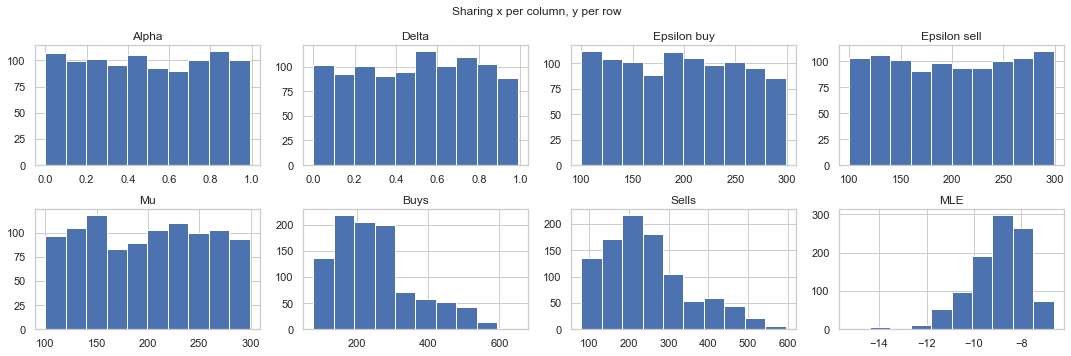

In [19]:
fig, axs = plt.subplots(2, 4,figsize=(15,5))
fig.suptitle('Distribution of values')
axs[0, 0].hist(df_1000["alpha"])
axs[0, 0].set_title("Alpha")
axs[0, 1].hist(df_1000["delta"])
axs[0, 1].set_title("Delta")
axs[0, 2].hist(df_1000["epsilon_b"])
axs[0, 2].set_title("Epsilon buy")
axs[0, 3].hist(df_1000["epsilon_s"])
axs[0, 3].set_title("Epsilon sell")
axs[1, 0].hist(df_1000["mu"])
axs[1, 0].set_title("Mu")
axs[1, 1].hist(df_1000["buy"])
axs[1, 1].set_title("Buys")
axs[1, 2].hist(df_1000["sell"])
axs[1, 2].set_title("Sells")
axs[1, 3].hist(df_1000["MLE"])
axs[1, 3].set_title("MLE")
plt.tight_layout()

# Comparison graphs

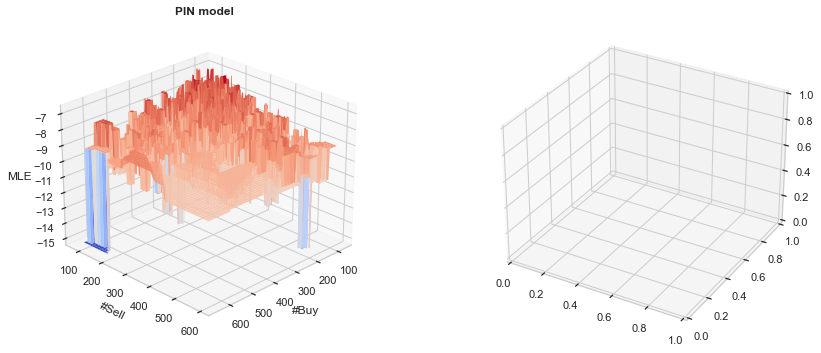

In [26]:

def make_surf_plot(X, Y, Z, ax):
        """
        Create a volatility surface plot
        """
        XX, YY = np.meshgrid(np.linspace(min(X), max(X), 230), np.linspace(min(Y), max(Y), 230))
        ZZ = griddata(np.array([X, Y]).T, np.array(Z), (XX, YY), method='nearest')

        ax.plot_surface(XX, YY, ZZ, cmap=cm.coolwarm, linewidth=0)
        ax.view_init(25, 45)
        ax.set_xlabel('#Buy')
        ax.set_ylabel('#Sell')
        ax.set_zlabel('MLE')
        plt.tight_layout()
        return fig, ax

fig = plt.figure(figsize=[6.4 * 2, 4.8])
ax = fig.add_subplot(1, 2, 1, projection='3d')

fig, ax = make_surf_plot(df_1000['buy'], df_1000['sell'], df_1000['MLE'], ax)
ax.set_title("PIN model", fontsize=12, fontweight='bold')

ax = fig.add_subplot(1, 2, 2, projection='3d')